In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [75]:
import networkx as nx
from graph2plan.dcel.create import create_embedding
from sympy import Line, Point, sqrt

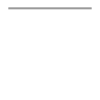

In [3]:
base = (0,0)
top = (0,1)
bottom = (0,-1)
side = (1,0)

ltop = Line(base, top)
lbottom = Line(base, bottom)
lbase = Line(base, side)
lbase

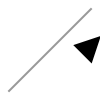

In [62]:
q = (sqrt(2)/2)
h = 1/2
q2 = (-q, q)
q3 = (-q,-q)
lq2 = Line(base, q2)
lq3 = Line(base, q3)
lq3

In [63]:
lbase.angle_between(lq2)

3*pi/4

In [64]:
lbase.angle_between(lq3)

3*pi/4

In [65]:
lbase.smallest_angle_between(lq3)

pi/4

In [53]:
lbase.angle_between(lbottom)

pi/2

In [5]:
assert lbase
assert ltop
(lbase.points[0]).compare(lbase.points[1])

-1

In [6]:
lbottom.angle_between(ltop)

pi

In [66]:
lbottom.angle_between(lbottom)

0

In [7]:
ltop.angle_between(lbottom)

pi

In [8]:
lbase.angle_between(lbottom)

pi/2

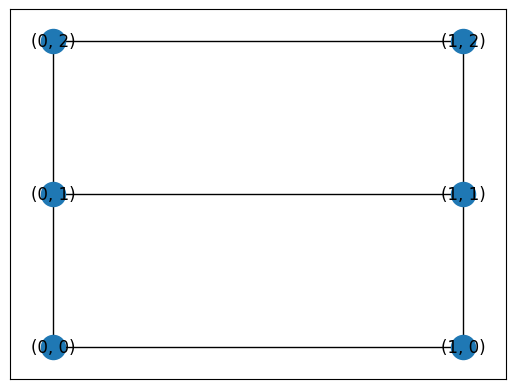

In [76]:
H = nx.grid_2d_graph(2,3)
pos = {i:i for i in H.nodes}
r = nx.draw_networkx(H, pos)

In [28]:
not True

False

In [77]:
e = create_embedding(H, pos)


4 - before_nbs of (0, 1): [(1, 1), (0, 0)]
edge: (((0, 1), (0, 2)), ((0, 1), (0, 0))) -- small_angle: 0, angle: pi
edge: (((0, 1), (0, 2)), ((0, 1), (1, 1))) -- small_angle: pi/2, angle: pi/2
edge: ((0, 1), (0, 2)), type: 4, curr_nbs: [(0, 2), (1, 1), (0, 0)]

4 - before_nbs of (1, 1): [(1, 0), (0, 1)]
edge: (((1, 1), (1, 2)), ((1, 1), (0, 1))) -- small_angle: pi/2, angle: pi/2
edge: (((1, 1), (1, 2)), ((1, 1), (1, 0))) -- small_angle: 0, angle: pi
edge: ((1, 1), (1, 2)), type: 4, curr_nbs: [(1, 0), (0, 1), (1, 2)]


In [79]:
v = (0,0)
w = (1,0)
e.traverse_face(w,v)

[(1, 0), (0, 0), (0, 1), (1, 1)]

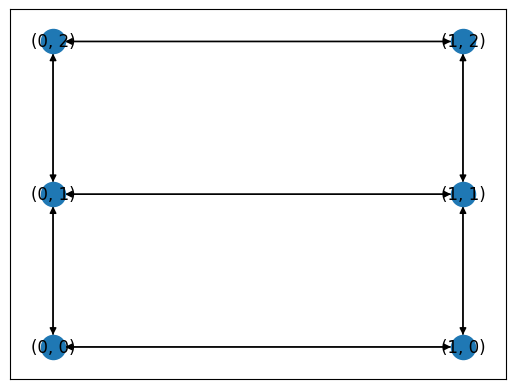

In [40]:
nx.draw_networkx(e.to_directed(), pos)

In [43]:
v = (1,1)
list(e.neighbors_cw_order(v))

[(1, 0), (1, 2), (0, 1)]

In [72]:
print(e.check_structure())

None


[(1, 0), (1, 2), (0, 1)]

In [79]:
e.successors(v)

In [78]:
v = (0,1)
list(e.neighbors_cw_order(v))

[(1, 1), (0, 2), (0, 0)]

In [74]:

e.traverse_face((0,1), (0,0))

[(0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 2),
 (1, 2),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 2),
 (0, 2)]

In [40]:
e.traverse_face((0,2), (1,2))

[(0, 2),
 (1, 2),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 2),
 (0, 2),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1)]

In [43]:
sorted(e.traverse_face((0,0), (0,1))) == sorted(e.traverse_face((0,1), (0,0)))

True

In [35]:
e.check_structure()

NetworkXException: Bad embedding. The graph does not match Euler's formula

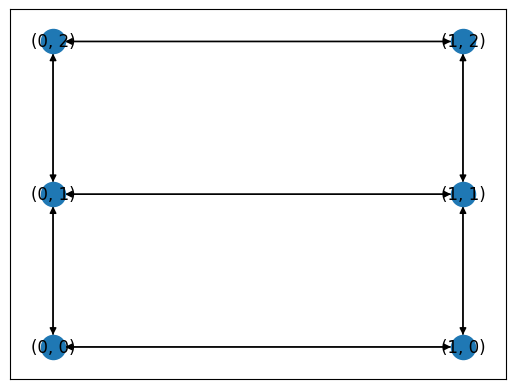

In [34]:
nx.draw_networkx(e.to_directed(), pos)


4 - before_nbs of (0, 0, 0): [(0, 1, 0), (1, 0, 0)]
edge: (((0, 0, 0), (0, 0, 1)), ((0, 0, 0), (1, 0, 0))) -- small_angle: pi/4, angle: pi/4
edge: (((0, 0, 0), (0, 0, 1)), ((0, 0, 0), (0, 1, 0))) -- small_angle: acos(5*sqrt(34)/34), angle: acos(5*sqrt(34)/34)
edge: ((0, 0, 0), (0, 0, 1)), type: 4, curr_nbs: [(0, 0, 1), (0, 1, 0), (1, 0, 0)]

4 - before_nbs of (0, 0, 1): [(0, 0, 0), (1, 0, 1)]
edge: (((0, 0, 1), (0, 1, 1)), ((0, 0, 1), (1, 0, 1))) -- small_angle: acos(3*sqrt(10)/10), angle: acos(-3*sqrt(10)/10)
edge: (((0, 0, 1), (0, 1, 1)), ((0, 0, 1), (0, 0, 0))) -- small_angle: acos(3*sqrt(10)/10), angle: acos(3*sqrt(10)/10)
edge: ((0, 0, 1), (0, 1, 1)), type: 4, curr_nbs: [(0, 1, 1), (0, 0, 0), (1, 0, 1)]

4 - before_nbs of (0, 1, 0): [(1, 1, 0), (0, 0, 0)]
edge: (((0, 1, 0), (0, 1, 1)), ((0, 1, 0), (0, 0, 0))) -- small_angle: acos(15/17), angle: acos(15/17)
edge: (((0, 1, 0), (0, 1, 1)), ((0, 1, 0), (1, 1, 0))) -- small_angle: acos(5*sqrt(34)/34), angle: acos(-5*sqrt(34)/34)
edge:

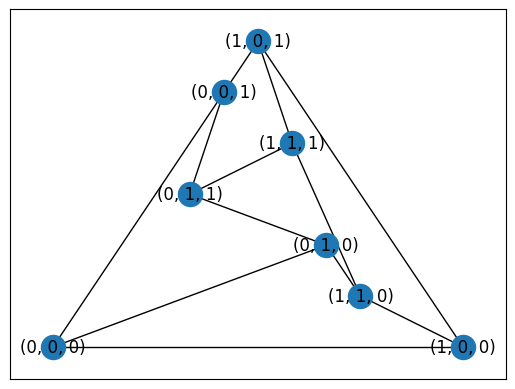

In [ ]:
H = nx.hypercube_graph(3)
pos = nx.planar_layout(H)
nx.draw_networkx(H, pos)
e = create_embedding(H, pos)
e.check_structure()

In [36]:
e.check_structure()

In [37]:
v=(0,0,0)
list(e.neighbors_cw_order(v))

[(0, 0, 1), (0, 1, 0), (1, 0, 0)]

In [ ]:
v=(0,0,0)
list(e.neighbors_cw_order(v))

In [12]:
e.traverse_face(v=(0,0,0), w=(1,0,0))

[(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0)]

In [46]:
v=(0,0,0)
w=(1,0,0)
sorted(e.traverse_face(v,w)) == sorted(e.traverse_face(w,v))

False


4 - before_nbs of (1, 0): [(0, 0), (1, 1)]
edge: (((1, 0), (0, 1)), ((1, 0), (1, 1))) -- small_angle: pi/4, angle: pi/4
edge: (((1, 0), (0, 1)), ((1, 0), (0, 0))) -- small_angle: pi/4, angle: pi/4
edge: ((1, 0), (0, 1)), type: 4, curr_nbs: [(0, 0), (0, 1), (1, 1)]

4 - before_nbs of (0, 1): [(1, 0), (0, 0)]
edge: (((0, 1), (1, 1)), ((0, 1), (0, 0))) -- small_angle: pi/2, angle: pi/2
edge: (((0, 1), (1, 1)), ((0, 1), (1, 0))) -- small_angle: pi/4, angle: pi/4
edge: ((0, 1), (1, 1)), type: 4, curr_nbs: [(1, 1), (1, 0), (0, 0)]

4 - before_nbs of (0, 1): [(1, 1), (1, 0), (0, 0)]
edge: (((0, 1), (0, 2)), ((0, 1), (0, 0))) -- small_angle: 0, angle: pi
edge: (((0, 1), (0, 2)), ((0, 1), (1, 0))) -- small_angle: pi/4, angle: 3*pi/4
edge: (((0, 1), (0, 2)), ((0, 1), (1, 1))) -- small_angle: pi/2, angle: pi/2
edge: ((0, 1), (0, 2)), type: 4, curr_nbs: [(0, 2), (1, 1), (1, 0), (0, 0)]

4 - before_nbs of (0, 1): [(0, 2), (1, 1), (1, 0), (0, 0)]
edge: (((0, 1), (1, 2)), ((0, 1), (0, 0))) -- small_

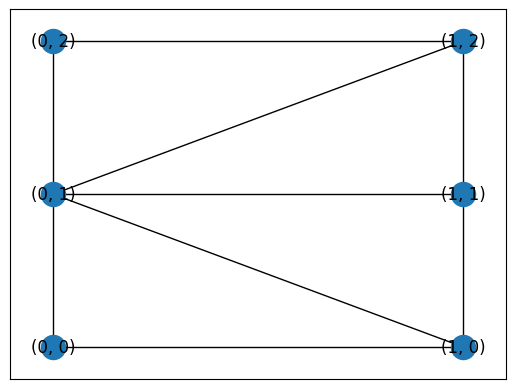

In [ ]:
A = nx.triangular_lattice_graph(2,2)
# pos = {i[0]:i[1]["pos"] for i in A.nodes(data=True)}
pos = {i:i for i in A.nodes}
nx.draw_networkx(A, pos)
ea = create_embedding(A, pos)
ea

In [71]:
ea.check_structure()

In [ ]:
# assert that works.. test that faces are valid.. 

In [14]:
pos

{(0, 0): (0.0, 0.0),
 (1, 0): (1.0, 0.0),
 (2, 0): (2.0, 0.0),
 (0, 1): (0.5, 0.8660254037844386),
 (1, 1): (1.5, 0.8660254037844386),
 (2, 1): (2.5, 0.8660254037844386),
 (0, 2): (0.0, 1.7320508075688772),
 (1, 2): (1.0, 1.7320508075688772),
 (2, 2): (2.0, 1.7320508075688772),
 (0, 3): (0.5, 2.598076211353316),
 (1, 3): (1.5, 2.598076211353316),
 (2, 3): (2.5, 2.598076211353316)}

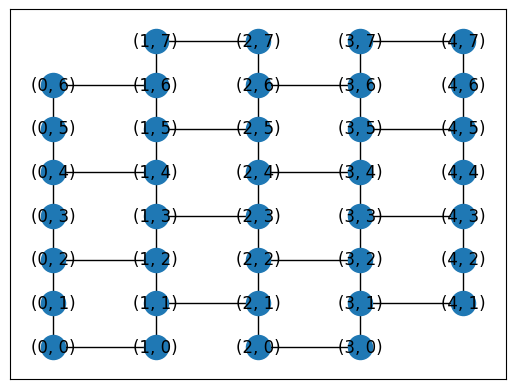

In [ ]:
A = nx.hexagonal_lattice_graph(3,4)
pos = {i[0]:i[1]["pos"] for i in A.nodes(data=True)}
# pos = {i:i for i in A.nodes}
nx.draw_networkx(A, pos)

In [82]:
e = create_embedding(A, pos)
e.check_structure()


4 - before_nbs of (0, 2): [(0, 1), (0, 3)]
edge: (((0, 2), (1, 2)), ((0, 2), (0, 3))) -- small_angle: acos(12500000000000*sqrt(625000000000001464921241321)/625000000000001464921241321), angle: acos(-12500000000000*sqrt(625000000000001464921241321)/625000000000001464921241321)
edge: (((0, 2), (1, 2)), ((0, 2), (0, 1))) -- small_angle: acos(500000000000000*sqrt(1000000000000004075924793682481)/1000000000000004075924793682481), angle: acos(-500000000000000*sqrt(1000000000000004075924793682481)/1000000000000004075924793682481)
edge: ((0, 2), (1, 2)), type: 4, curr_nbs: [(1, 2), (0, 1), (0, 3)]

4 - before_nbs of (0, 4): [(0, 3), (0, 5)]
edge: (((0, 4), (1, 4)), ((0, 4), (0, 5))) -- small_angle: acos(12500000000000*sqrt(625000000000001464921241321)/625000000000001464921241321), angle: acos(-12500000000000*sqrt(625000000000001464921241321)/625000000000001464921241321)
edge: (((0, 4), (1, 4)), ((0, 4), (0, 3))) -- small_angle: acos(50000000000000*sqrt(9999999999999850233659104249)/9999999999